# K-NEAREST NEIGHBOURS

## Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
## Dataset:
Need to Classify the animal type
## Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

## Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?

## Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

######  1. Analyse the data using the visualizations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('zoo.csv')
data.head(2)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


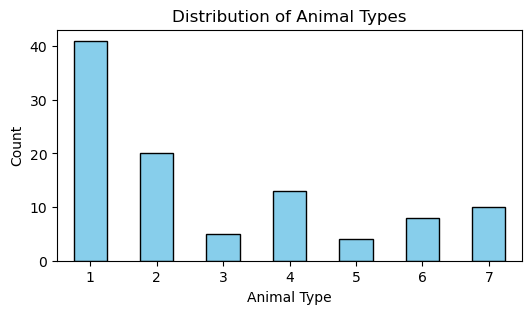

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Counts of each animal type is visualized.
plt.figure(figsize=(6, 3))
data['type'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Distribution of Animal Types")
plt.xticks(rotation=0)
plt.show()


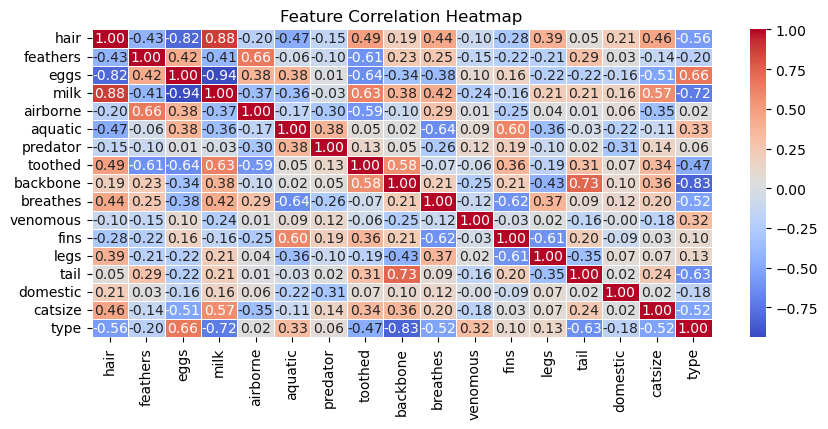

In [3]:
import seaborn as sns
# Heatmap is been generated to visualize Feature Correlation
plt.figure(figsize=(10,4))
sns.heatmap(data.drop(columns=['animal name']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
data.head(2)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


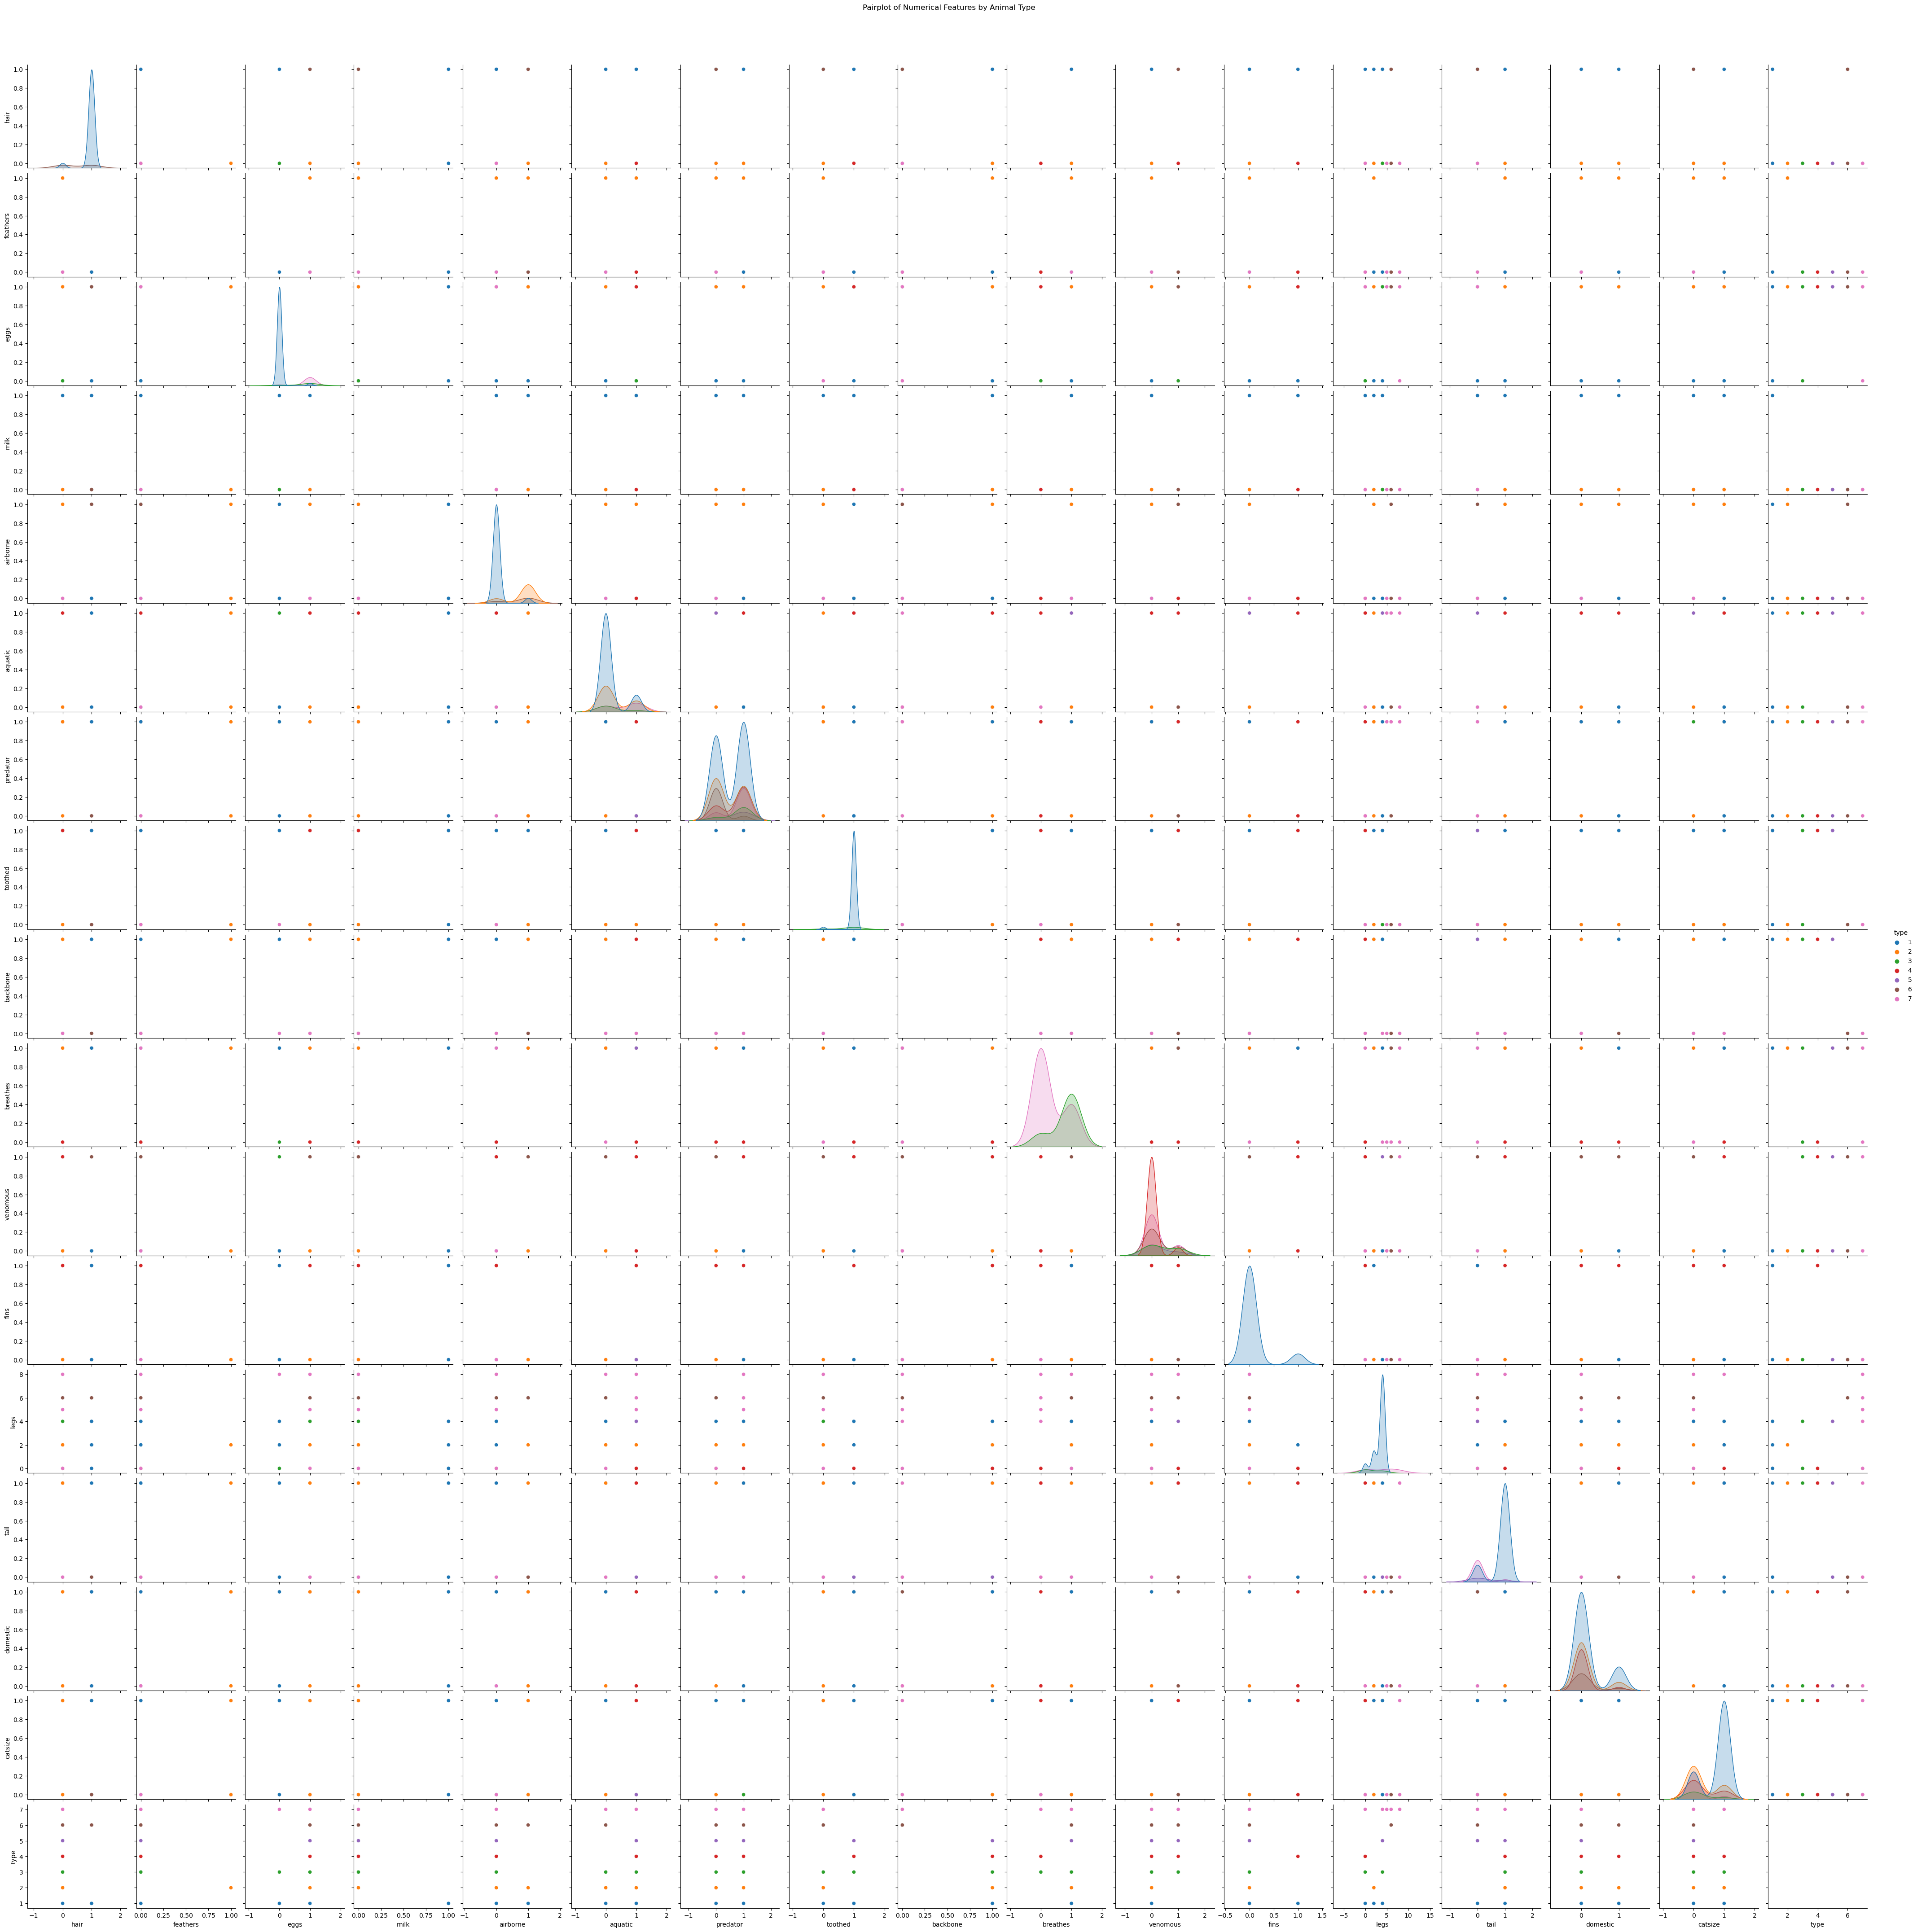

In [5]:
# Pairplot is been genearted to find relationships b/w numerical features
num_features = data.drop(columns=['animal name'])
sns.pairplot(data, vars=num_features, hue="type", palette="tab10", diag_kind="kde")

plt.suptitle("Pairplot of Numerical Features by Animal Type", y=1.02)
plt.show()

###### 2. Preprocess the data by handling missing values & Outliers, if any.

In [6]:
# checking for null values
data.isnull().sum() # No null values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

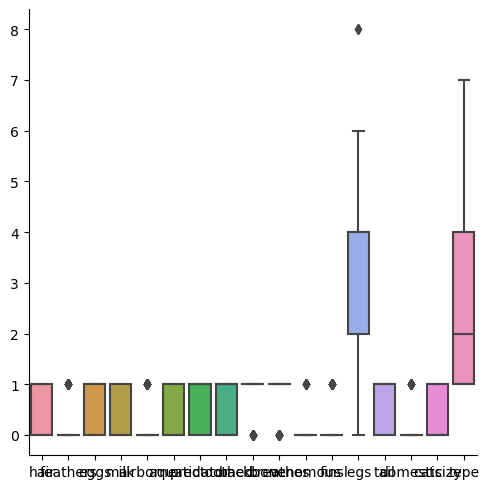

In [7]:
# checking for outliers
sns.catplot(data=data, kind='box')
plt.show()

###### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['animal name', 'type'])  
y = data['type']  

In [9]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [10]:
# standardizing improves KNN performance.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

###### 5. Choose an appropriate distance metric and value for K.

In [12]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

###### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1-Score: 0.93


###### 7. Visualize the decision boundaries of the classifier.

In [15]:
feature1, feature2 = 'legs', 'catsize'
X_vis = data[[feature1, feature2]].values
y_vis = data['type'].values

In [16]:
# Train KNN on these two features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

KNeighborsClassifier()

In [17]:
import numpy as np
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for mesh grid points
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

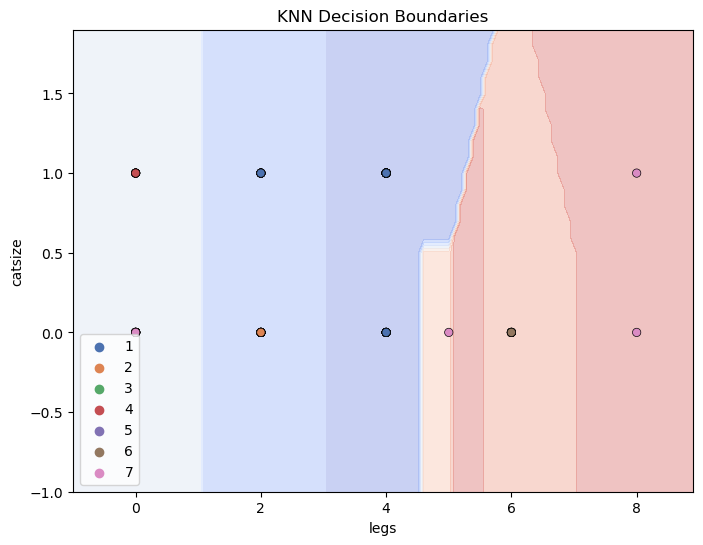

In [18]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis, palette="deep", edgecolor="black")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("KNN Decision Boundaries")
plt.show()

### Interview Questions:

1. What are the key hyperparameters in KNN?
+ The main hyperparameters in KNN are K i.e number of neighbors, distance metric ised to calculate distnace, and weighting function uniform or distance-based weights. Choosing the right K value helps balance bias and variance, while the distance metric affects how neighbors are measured.

2. What distance metrics can be used in KNN?
+ Common distance metrics include Euclidean which is default, that calculates straight-line distance, Manhattan is used to find sum of absolute differences and  Minkowski its generalized form of euclidean and Manhattan, The choice of metric depends on the type of data and problem, as different metrics affect classification results.